In [20]:
import cv2
import os
import sys
import imageio
import random
from scipy import misc
import numpy as np
from glob import glob

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
img_dir = ('./misc_imgs/')

### Semantic Segmentation and Depth Formatting

In [4]:
# http://carla.readthedocs.io/en/latest/cameras_and_sensors/#cameras-and-sensors
def labels_to_seg(file):
    """Convert an image containing CARLA semantic segmentation labels to Cityscapes palette."""
    classes = {
        0: [0, 0, 0],         # None
        1: [70, 70, 70],      # Buildings
        2: [190, 153, 153],   # Fences
        3: [72, 0, 90],       # Other
        4: [220, 20, 60],     # Pedestrians
        5: [153, 153, 153],   # Poles
        6: [157, 234, 50],    # RoadLines
        7: [128, 64, 128],    # Roads
        8: [244, 35, 232],    # Sidewalks
        9: [107, 142, 35],    # Vegetation
        10: [0, 0, 255],      # Vehicles
        11: [102, 102, 156],  # Walls
        12: [220, 220, 0]     # TrafficSigns
        }
    
    depth_seg = imageio.imread(file)
    result = np.zeros((depth_seg.shape[0], depth_seg.shape[1], 3))

    for key, value in classes.items():
        result[np.where(depth_seg[:,:,0] == key)] = value
    
    return result.astype(np.uint8)

In [5]:
def depth_to_grayscale(file):
    """Convert an image containing CARLA encoded depth-map to [0.0, 1.0] grayscale image"""  
    depth_rgb = imageio.imread(file)
    normalized_depth = np.dot(depth_rgb[:, :, :3], [1.0, 256.0, 65536.0])
    normalized_depth /= 16777215.0  # (256.0 * 256.0 * 256.0 - 1.0)

    logdepth = np.ones(normalized_depth.shape) + (np.log(normalized_depth) / 5.70378)
    logdepth = np.clip(logdepth, 0.0, 1.0)
    logdepth *= 255.0
    return logdepth.astype(np.uint8)

### Image path

In [25]:
data_dir  = "./train/Sun Training Data/Train_0001"
rgb_dir = data_dir + "/CameraRGB"
seg_dir = data_dir + "/CameraSeg"
seg_out_dir = data_dir + "/CameraSeg2" # Cityscapes palette folder
# depth_dir = data_dir + "/Cameradepth" # depth folder

rgb_path = os.path.join(rgb_dir, "*.png")
seg_path = os.path.join(seg_dir, "*.png")
seg2_path = os.path.join(seg_out_dir, "*.png")
# depth_path = os.path.join(depth_dir, "*.png")

1000 images has been processed.


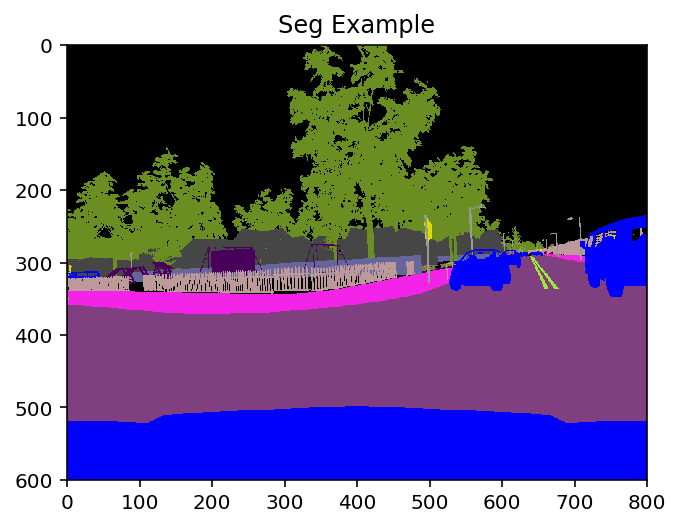

In [10]:
# Sem seg
total_num = 0
for i, file in enumerate(glob(seg_path)):
    file_name = os.path.basename(file)
    result = labels_to_seg(file)
    
    imageio.imwrite(seg_out_dir + '/' + file_name, result, format='png')
    total_num += 1

print(total_num, "images has been processed.")
plt.title('Seg Example')
plt.imshow(result)

In [11]:
# Depth image
depth_state = False

if depth_state:
    total_num = 0
    for i, file in enumerate(glob(depth_path)):
        file_name = os.path.basename(file)
        logdepth = depth_to_grayscale(file)

        imageio.imwrite(depth_output_dir + '/' + file_name, logdepth, format='png')
        total_num += 1

    print(total_num, "images has been processed.")
    plt.title("depth example")
    plt.imshow(logdepth, cmap='gray')

### Explore Dataset

In [53]:
image_paths = glob(rgb_path)
label_paths = {os.path.basename(path): path for path in glob(seg2_path)}

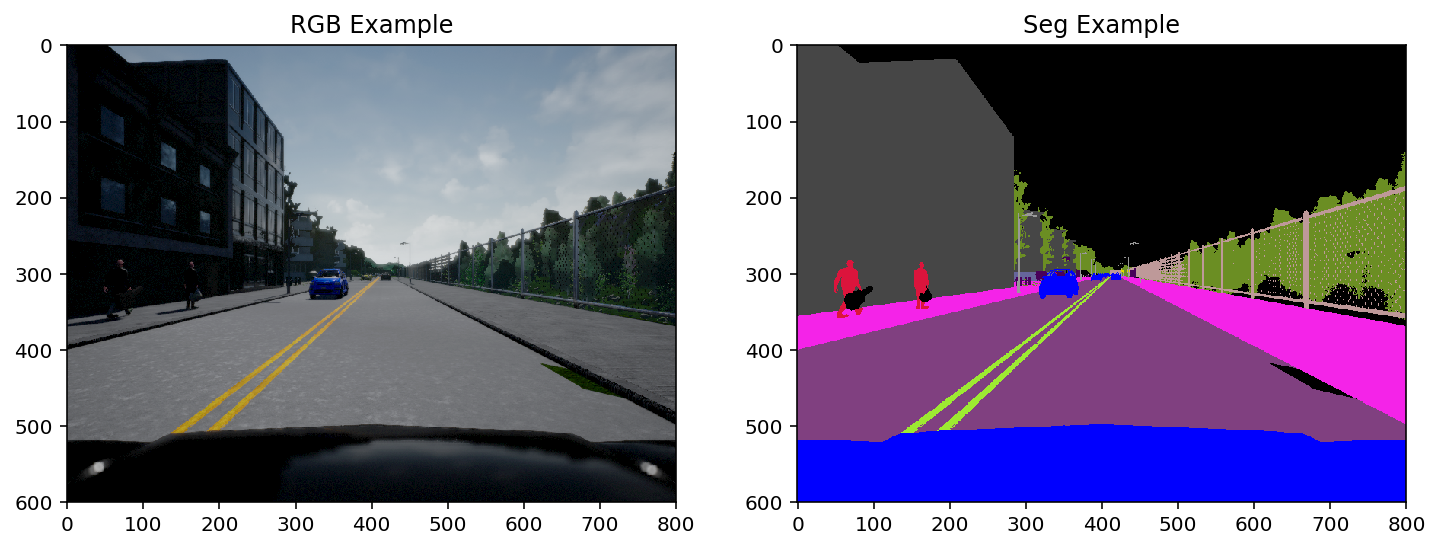

In [64]:
# Show random example
index = random.randint(0, len(glob(rgb_path)))
test_img_path = glob(rgb_path)[index]
seg_test_img_path = glob(seg2_path)[index]

test_img = imageio.imread(test_img_path)
seg_test_img = imageio.imread(seg_test_img_path)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.imshow(test_img)
plt.title('RGB Example')
plt.subplot(1,2,2)
plt.imshow(seg_test_img)
plt.title('Seg Example')
plt.show()

In [49]:
# Define some helper functions
def seg_plot(img):
    img_aux = np.concatenate((img, img, img), axis =2)
    plt.imshow(img_aux)
    plt.show()
def rgb_plot(img):
    plt.imshow(img)
    plt.show()

In [34]:
# main semantic segmentation labels
person_color = [220, 20, 60]
car_color = [0, 0, 255]
road_color = [128, 64, 128]
roadline_color = [157, 234, 50]
trafficsign_color = [220, 220, 0]

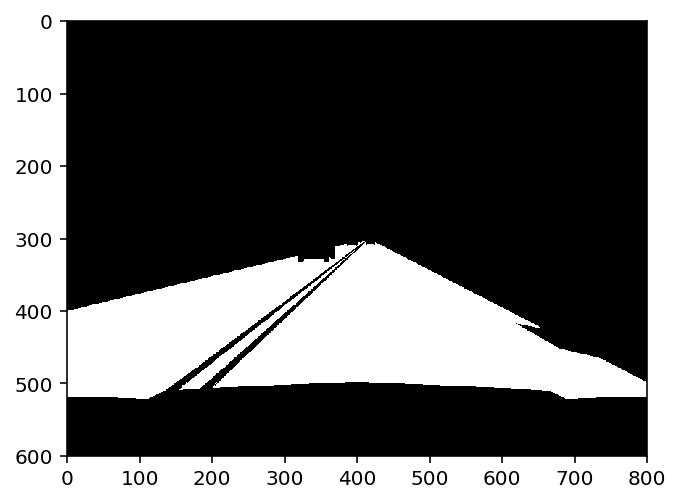

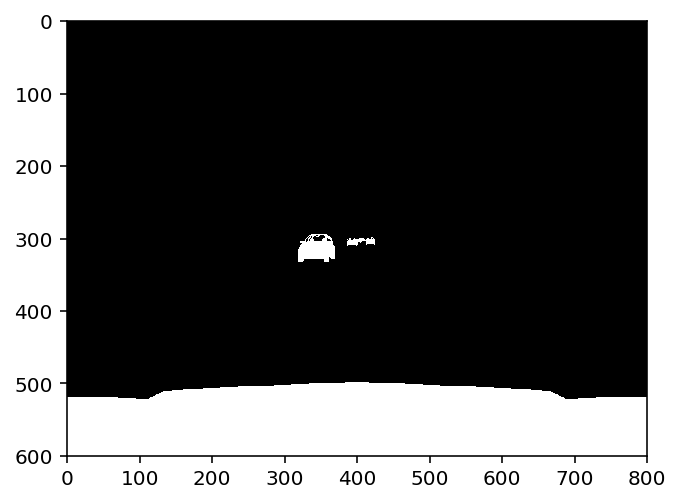

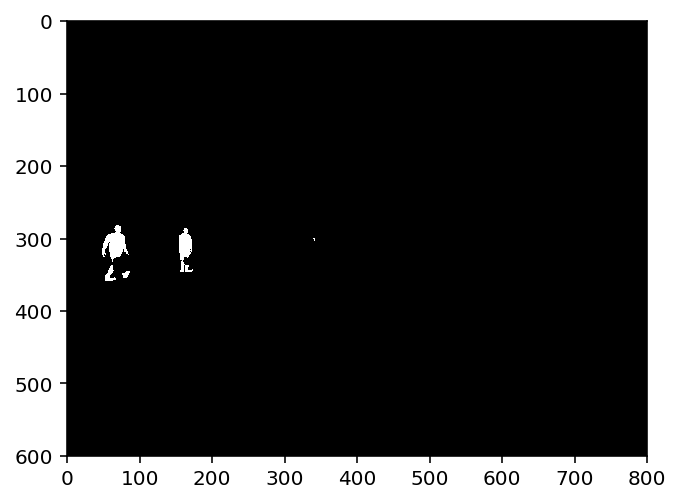

In [65]:
# show road mask
seg_road = np.all(seg_test_img == road_color, axis=2)
seg_road = seg_road.reshape(*seg_road.shape, 1)
seg_road_int = seg_road.astype(np.uint8)*255
seg_plot(seg_road_int)
# show car mask
seg_car = np.all(seg_test_img == car_color, axis=2)
seg_car = seg_car.reshape(*seg_car.shape, 1)
seg_car_int = seg_car.astype(np.uint8)*255
seg_plot(seg_car_int)
# show person mask
seg_person = np.all(seg_test_img == person_color, axis=2)
seg_person = seg_person.reshape(*seg_person.shape, 1)
seg_person_int = seg_person.astype(np.uint8)*255
seg_plot(seg_person_int)